In [5]:
import numpy as np
%matplotlib notebook
import matplotlib.pyplot as plt
import collections
import matplotlib.gridspec as gridspec # GRIDSPEC !
import corner

plt.rcParams['axes.formatter.useoffset'] = False

In [6]:
# This is the name of the folder where emcee and emcee_plot are stored, 
# it's the same of the configuration file but without the .yaml extension
dir_mods = '/home/ubuntu/Desktop/lab2/WASP-44/WASP-44-b/RV_analysis/harmonics/WASP44_RV_harmonics/'

# This name will be used to store all your 
filename = 'WASP44_RV_harmonics_cornerplot'


In [7]:
# Dictionary keyword is the filename in emcee_plot/planet_samples/
#Change the labels as you prefer
planet_dictionary = {
    'b_P.dat': 'Period [d]',
    'b_Tc.dat': 'Time of transit',
    'b_K.dat': 'Rv semi-amplitude [m/s]',
    'b_M_Mj.dat': 'Mass [M_j]',
}

# check if the reported filename is the same as in your case,
# the initial number may change from run to run
logln_samples = np.genfromtxt(dir_mods + 'emcee_plot/all_samples/' + 'log_likelihood.dat')

n_box = len(planet_dictionary) + 1
n_samples = len(logln_samples)

samples = np.empty([n_samples, n_box])
labels = []
i_index = 0

for i_index, key_name in enumerate(planet_dictionary):
    samples[:, i_index] = np.genfromtxt(dir_mods + 'emcee_plot/planet_samples/' + key_name)
    labels.append(planet_dictionary[key_name])

samples[:, i_index+1] = logln_samples
labels.append('log-likelihood ') # use a better label for the denisity in solar units


print(labels)

median = np.median(samples, axis=0)


['Period [d]', 'Time of transit', 'Rv semi-amplitude [m/s]', 'Mass [M_j]', 'log-likelihood ']


<IPython.core.display.Javascript object>


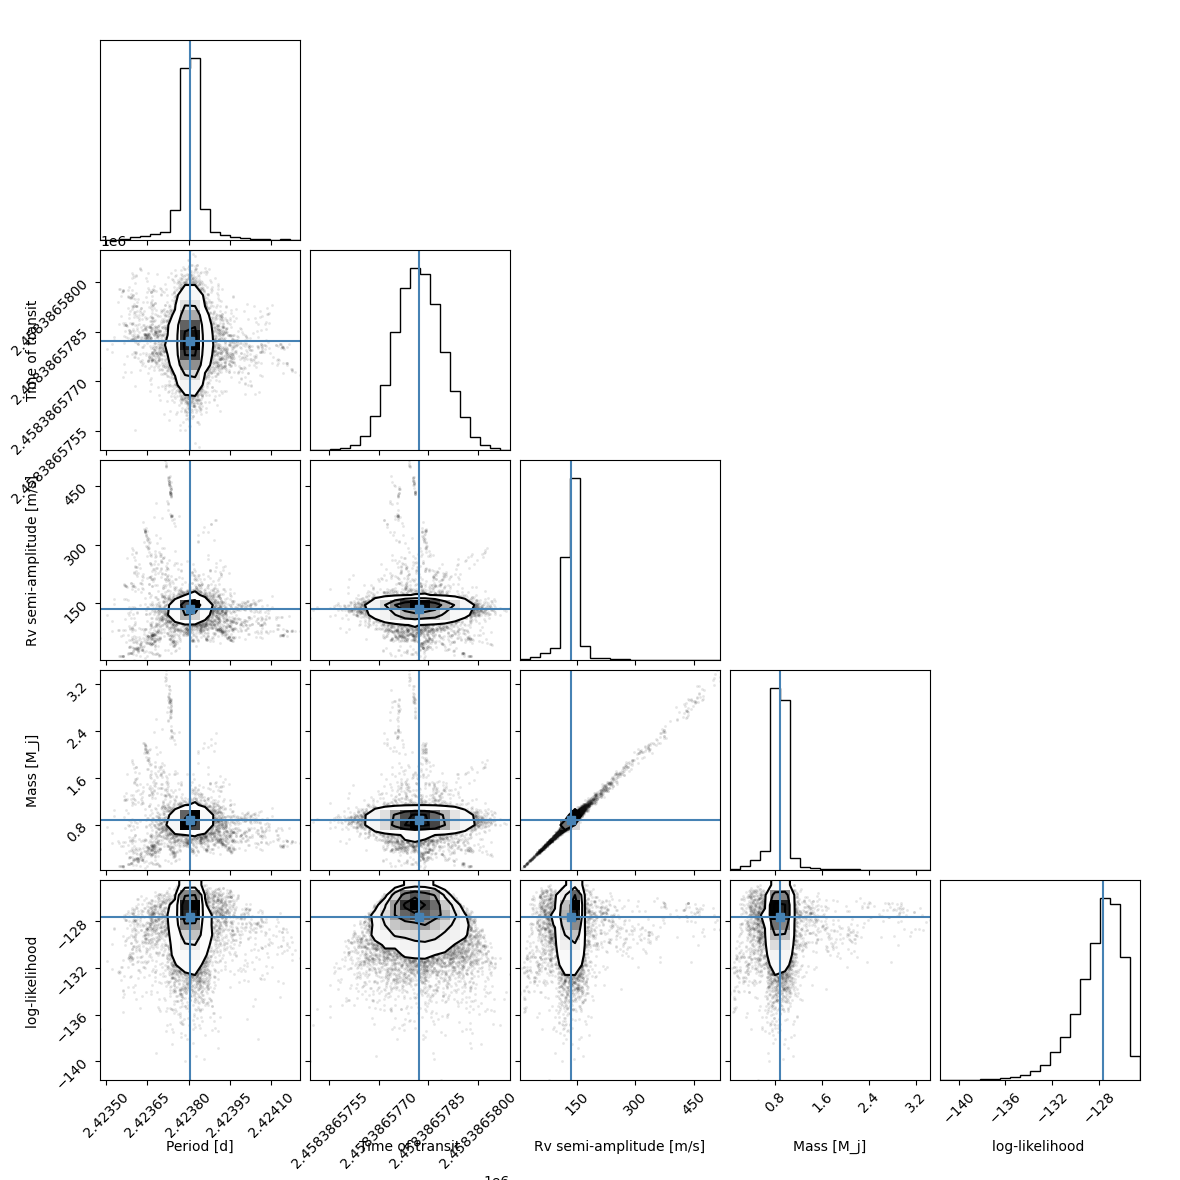

In [8]:
figure = corner.corner(samples, labels=labels, truths=median,
                       show_titles=False, title_kwargs={"fontsize": 12})
figure.savefig(filename + '.pdf', bbox_inches='tight', dpi=300)
#plt.close(figure)